In [290]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/imdb-dataset-sentiment-analysis-in-csv-format/Valid.csv
/kaggle/input/imdb-dataset-sentiment-analysis-in-csv-format/Train.csv
/kaggle/input/imdb-dataset-sentiment-analysis-in-csv-format/Test.csv


In [291]:
# !pip install google-cloud-translate

In [292]:
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import confusion_matrix,auc,roc_auc_score,f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,RandomizedSearchCV, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from scikitplot.metrics import plot_confusion_matrix
from nltk.stem import WordNetLemmatizer
from tqdm import tqdm
import re
from bs4 import BeautifulSoup
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
!pip install nltk
import nltk
!pip install numpy requests nlpaug
import nlpaug.augmenter.char as nac
import nlpaug.augmenter.word as naw
import nlpaug.augmenter.sentence as nas
import nlpaug.flow as nafc

from nlpaug.util import Action


In [293]:
# from google.cloud import translate_v2 as translate

# translate_client = translate.Client.from_service_account_json('/kaggle/input/key-translator/micro-atrium-368104-e24b1f445501.json')


In [294]:
# df=pd.read_csv("/kaggle/input/hindi-data/Hindi_pos-neg dataset-train.csv")
# df2 = pd.read_csv("/kaggle/input/eng-data-review/eng-data-train.csv",encoding='unicode_escape')
# df3 = pd.read_csv("/kaggle/input/hindi-train/hindi_train.csv",encoding='unicode_escape')

df1=pd.read_csv("/kaggle/input/imdb-dataset-sentiment-analysis-in-csv-format/Train.csv")
df1=df1[0:5000]


In [295]:
# mkdir nltk_data
# python -m nltk.downloader
# nltk.download("wordnet","/nltk_data/")
# nltk.download("wordnet")

In [296]:
# nltk.download("wordnet", "whatever_the_absolute_path_to_myapp_is/nltk_data/")
# text = 'आपकी राशि से चंद्रमा दूसरे भाव में है'
# aug = naw.SynonymAug(aug_src='wordnet', lang='hi')
# augmented_text = aug.augment(text)
# print("Original:")
# print(text)
# print("Augmented Text:")
# print(augmented_text)

In [297]:

# to append df2 at the end of df1 dataframe
# df.append(df2)
# # df2
# df= pd.concat([df, df3], axis=0)
# # df1['text'][477]
# df


In [298]:
# text = 'Bonjour tout le monde'

# for ind in range(1):
#     result = translate_client.translate(text, target_language='en')
# #     df1.loc['text'][ind]=result
# #     df.loc[ind, 'text'] = result['translatedText']
# #     df1 = pd.DataFrame({"text":result,"experience":df['experience'][ind]})

#     print(result['translatedText'])


# # print(result['input'])
# # print(result['translatedText'])


In [299]:
df1.isnull().any()

text     False
label    False
dtype: bool

Text(0.5, 1.0, 'Labels')

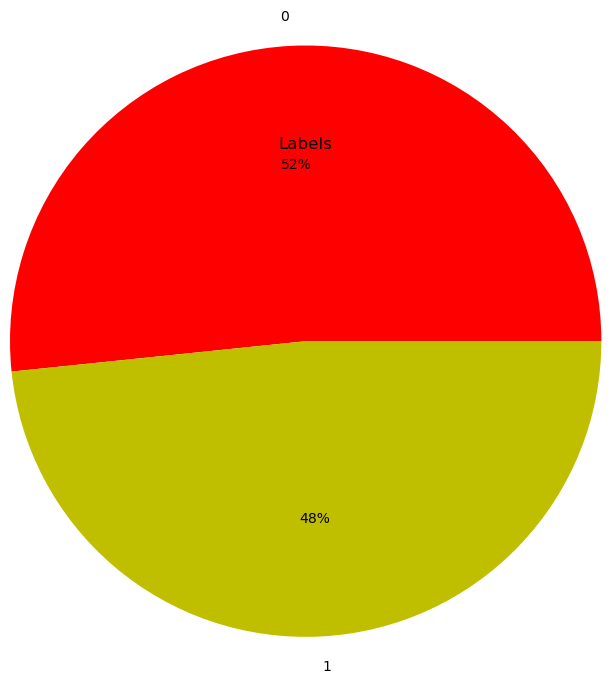

In [300]:
plt.pie(df1["label"].value_counts(),autopct='%1.0f%%',radius=2,labels=df1["label"].unique(),colors=["r","y"])
plt.title("Labels")

In [301]:
review500=df1["text"][500]
print(review500)
# review34

Just because an event really happened doesn't mean that it will make a good screenplay/ movie. The Cat's Meow, by Peter Bogdanovich claims to be based on actual events which happened on a cruise hosted by William Randolph Hurst. The writer paid more attention to creating a bizarre cast of characters than taking time to create a story for the bizarre characters to inhabit. The key moments of the story seem implausible; for example, when Hurst accidentally shoots the producer, believing him to be Chaplin. Basing a key element of a story on someone wearing the wrong hat is trite and contrived. The story attempts to be a dark comedy, but The Cat's Meow misses an important piece of this equation, comedy. There is also a lack of empathy for any of the characters. It hardly matters who is shot, who is killed, who is guilty and who is innocent. There is not a strong character to cheer for. As a result the conflicts are difficult to care about and the eventual outcome is incidental.


In [302]:
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [303]:
print(stop_words)

{'those', 'by', 'after', "you'd", 'haven', 'isn', "wouldn't", 've', 'over', 'ma', 'theirs', 'above', 'through', "hadn't", 'have', 'until', 'wouldn', 'under', "it's", 'won', 'during', 'yourselves', 'here', "won't", 'to', 'ours', 'if', 'same', "aren't", 'not', 'am', 'why', 'out', "doesn't", 'themselves', 'once', "weren't", 'were', 'him', 'will', 'while', 'both', 't', 'which', "shouldn't", 'doesn', 'against', 'a', 'their', 'from', 'mustn', 'wasn', 'being', 'up', "haven't", 'we', 'doing', 'now', 'this', 'its', 'about', 'own', 'aren', 'my', 'her', 'further', 'didn', "shan't", 'below', 'hasn', 'then', "wasn't", 'off', 'with', 'is', "mightn't", 'are', 'y', 'them', 'so', 'because', 'they', 'who', 'been', 'and', 'himself', 'can', 'just', 'your', 'few', 'hadn', 're', 'should', 'needn', 'of', "don't", "you'll", 'ain', 'there', 'some', 'at', 'in', 'any', 'on', 'has', 'had', 'it', 'most', 'the', 'what', 'that', 'you', "you've", 'ourselves', 'be', 'than', 'mightn', 'more', 'no', 'nor', 'other', 'but

In [304]:
#let us remove word not from stop words, since it is the one of the most important word in classifing the review.
stop_words.remove("not")

In [305]:
def text_Preprocessing(reviews):
    
    
    """ This will clean the text data, remove html tags, remove special characters and then tokenize the reviews to apply Stemmer on each word token."""
    
    pre_processed_reviews=[]
    
    for review in tqdm(reviews):
        review= BeautifulSoup(review,'lxml').getText()    #remove html tags
        review=re.sub('\S*\d\S*','',review).strip()
        review=re.sub('[^A-Za-z]+',' ',review)        #remove special chars
        review=re.sub("n't","not",review)
        review=word_tokenize(str(review.lower())) #tokenize the reviews into word tokens

        # now we will split the review into words and then check if these words are in the stop words if so we will remove them, if not we will join
        review=' '.join(PorterStemmer().stem(word) for word in review if word not in stop_words)
        pre_processed_reviews.append(review.strip())
    return pre_processed_reviews

In [306]:
preprocessed_reviews=text_Preprocessing(df1["text"])
preprocessed_reviews[500]

 10%|█         | 502/5000 [00:04<00:35, 126.80it/s]/opt/conda/lib/python3.7/site-packages/bs4/__init__.py:439: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  MarkupResemblesLocatorWarning
100%|██████████| 5000/5000 [00:38<00:00, 128.48it/s]


'event realli happen mean make good screenplay movi cat meow peter bogdanovich claim base actual event happen cruis host william randolph hurst writer paid attent creat bizarr cast charact take time creat stori bizarr charact inhabit key moment stori seem implaus exampl hurst accident shoot produc believ chaplin base key element stori someon wear wrong hat trite contriv stori attempt dark comedi cat meow miss import piec equat comedi also lack empathi charact hardli matter shot kill guilti innoc not strong charact cheer result conflict difficult care eventu outcom incident'

In [307]:
preprocessed_reviews=pd.DataFrame({"text":preprocessed_reviews,"sentiment":df1.label})
preprocessed_reviews.head()

,text,sentiment
0,grew b watch love thunderbird mate school watc...,0
1,put movi dvd player sat coke chip expect hope ...,0
2,peopl not know particular time past like feel ...,0
3,even though great interest biblic movi bore de...,0
4,im die hard dad armi fan noth ever chang got t...,1


In [308]:
preprocessed_reviews.sentiment.value_counts()

0    2582
1    2418
Name: sentiment, dtype: int64

Observations:
1. we cleaned our text data, removed unnecessary tags
2. Though we cleaned our data, it is still in string format which computers won't understand, for this we use text featuration.

### Featurization

In [309]:
from sklearn.preprocessing import StandardScaler

In [310]:
reviews_train,reviews_test,sentiment_train,sentiment_test=train_test_split(preprocessed_reviews.text,preprocessed_reviews.sentiment)
print(reviews_train.shape,reviews_test.shape)
print(sentiment_train.shape,sentiment_test.shape)

(3750,) (1250,)
(3750,) (1250,)


In [311]:
tfidf_model=TfidfVectorizer(ngram_range=(1,2),min_df=10, max_features=6000)
tfidf_model.fit(reviews_train,sentiment_train)
reviews_train_tfidf=tfidf_model.transform(reviews_train)
reviews_test_tfidf=tfidf_model.transform(reviews_test)
reviews_train_tfidf.shape,reviews_test_tfidf.shape
# tfidf_vector_X = vectorizer.transform(X).toarray()  #//shape - (3,6)
# tfidf_vector_Y = vectorizer.transform(Y).toarray()
# tfidf_vector_X = tfidf_vector_X[:, :, None] #shape - (3,6,1) since LSTM cells expects ndims = 3
# tfidf_vector_Y = tfidf_vector_Y[:, :, None] #shape - (3,6,1)


((3750, 6000), (1250, 6000))

In [312]:
from tensorflow.keras.preprocessing.text import Tokenizer
token = Tokenizer()
token.fit_on_texts(reviews_train)

In [313]:
train_sequences = token.texts_to_sequences(reviews_train)
valid_sequences = token.texts_to_sequences(reviews_test)

In [314]:
vocab_size = len(token.word_index)+1
vocab_size

22856

In [315]:
maxlen=100

In [316]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
X_train = pad_sequences(train_sequences, maxlen=maxlen,padding = 'post')
X_test = pad_sequences(valid_sequences, maxlen=maxlen,padding = 'post')

In [317]:
tfidf_df=pd.DataFrame(reviews_train_tfidf.toarray(),columns=tfidf_model.get_feature_names(),index=reviews_train.index)
tfidf_df

,abandon,abc,abduct,abil,abl,abound,absenc,absent,absolut,absolut love,...,young kid,young man,young woman,younger,youth,youtub,zane,zero,zombi,zone
565,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3940,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.251692,0.0,0.0,0.0,0.0,0.0,0.0
41,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3505,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4152,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2350,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4693,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2148,0.0,0.0,0.0,0.123912,0.0,0.0,0.0,0.0,0.091384,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1856,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [318]:
# Lets checkout the top features
top_features=sorted(zip(tfidf_model.idf_,tfidf_model.get_feature_names()))
top10=top_features[:10]

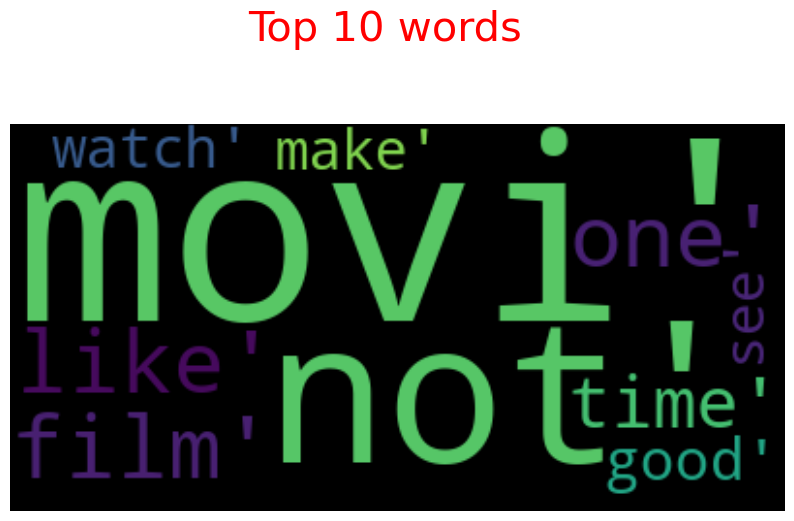

In [319]:
from wordcloud import WordCloud
plt.figure(figsize=(10,8))
wc = WordCloud(background_color="black",max_font_size=150, random_state=42)
wc.generate(str(top10))
plt.imshow(wc, interpolation='bilinear')
plt.suptitle('Top 10 words', size=30, y=0.88,color="r"); 
plt.axis("off")
plt.savefig("top10_words.png")
plt.show()

# Modeling

In [320]:
from imblearn.over_sampling import SMOTE
# Resample the minority class. You can change the strategy to 'auto' if you are not sure.
sm = SMOTE(sampling_strategy='auto', random_state=7)

oversampled_trainX, oversampled_trainY = sm.fit_resample(reviews_train_tfidf,sentiment_train)
oversampled_trainY.value_counts()

1    1912
0    1912
Name: sentiment, dtype: int64

## Support Vector Classifier

In [321]:
svc_model=SVC(C=1,kernel='rbf',max_iter=200)
svc_model.fit(oversampled_trainX,oversampled_trainY)
svc_predict=svc_model.predict(reviews_test_tfidf)
svc_f1=f1_score(sentiment_test,svc_predict,average="weighted")
svc_f1

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


0.7531047893548541

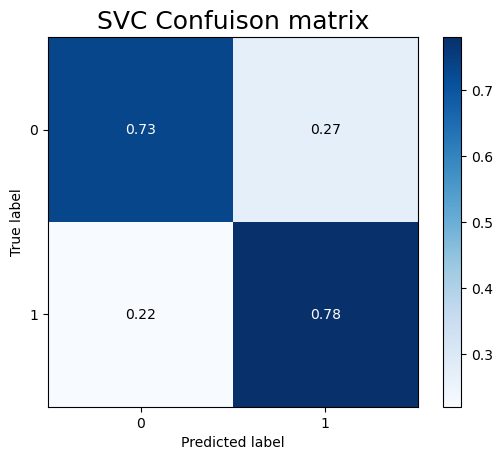

In [322]:
plot_confusion_matrix(sentiment_test,svc_predict,normalize=True)
plt.title("SVC Confuison matrix",size=18)
plt.show()

In [323]:
from sklearn.metrics import classification_report
target_names = ['Negative', 'Positive']  # Specify the class names
report = classification_report(sentiment_test,svc_predict, target_names=target_names)
print(report)

              precision    recall  f1-score   support

    Negative       0.79      0.73      0.76       670
    Positive       0.71      0.78      0.75       580

    accuracy                           0.75      1250
   macro avg       0.75      0.75      0.75      1250
weighted avg       0.76      0.75      0.75      1250



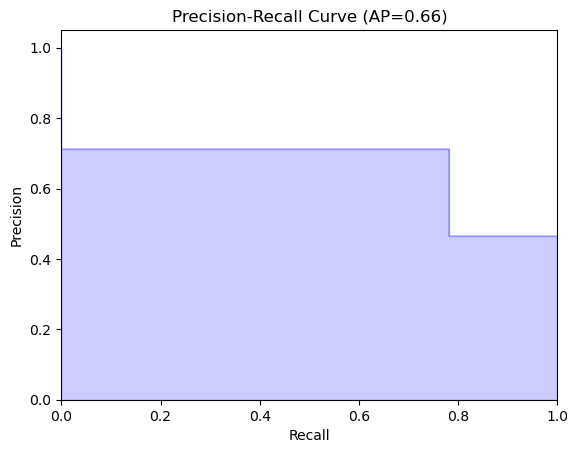

In [324]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# Assuming you've already trained your SVC model as 'svc_model' and made predictions as 'svc_predict'

# Calculate the precision and recall values
precision, recall, _ = precision_recall_curve(sentiment_test, svc_predict)

# Calculate the average precision score
average_precision = average_precision_score(sentiment_test, svc_predict)

# Plot the precision-recall curve
plt.figure()
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve (AP={0:0.2f})'.format(average_precision))
plt.show()


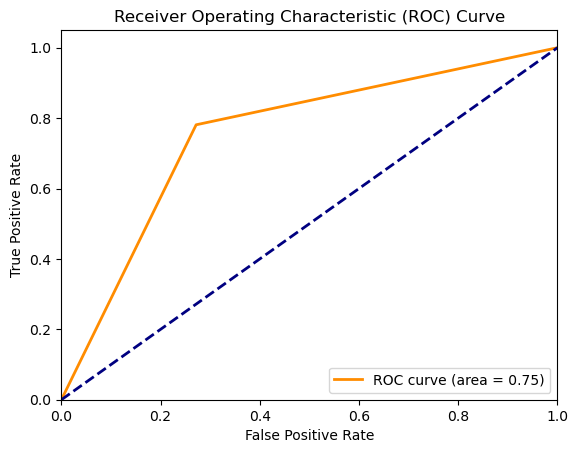

In [325]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.svm import SVC

# Assuming you've already trained your SVC model as 'svc_model' and made predictions as 'svc_predict'

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(sentiment_test, svc_predict)

# Calculate ROC AUC (Area Under the Curve)
roc_auc = roc_auc_score(sentiment_test, svc_predict)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


## Naive Bayes:

In [354]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score
import numpy as np

# Set the alpha value manually
alpha_value = 125  # Set alpha to 250

# Create a Multinomial Naive Bayes classifier instance with the chosen alpha
nb_clf = MultinomialNB(alpha=alpha_value)

# Introduce random noise to training labels
noise_ratio = 0.1  # Adjust the noise ratio as needed
noisy_labels = np.random.choice([0, 1], size=len(oversampled_trainY), p=[noise_ratio, 1 - noise_ratio])
noisy_trainY = np.where(noisy_labels == 1, oversampled_trainY, 1 - oversampled_trainY)

# Fit the classifier to your training data with noisy labels
nb_clf.fit(oversampled_trainX, noisy_trainY)

# Make predictions on the test data
nb_predict = nb_clf.predict(reviews_test_tfidf)

# Calculate the weighted F1-score
nb_f1 = f1_score(sentiment_test, nb_predict, average="weighted")

# Print the F1-score
print("Weighted F1-Score:", nb_f1)


Weighted F1-Score: 0.788326437565247


Text(0.5, 1.0, 'Naive Bayes Confusion Matrix')

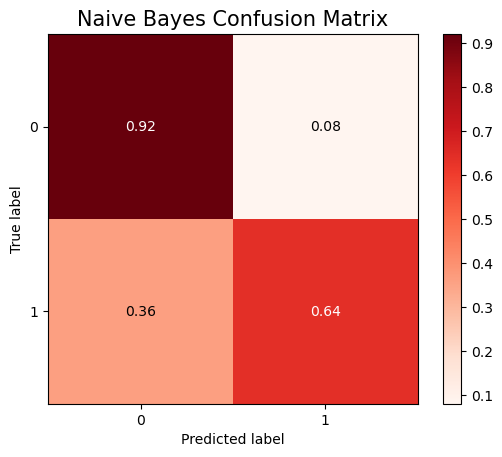

In [355]:
plot_confusion_matrix(sentiment_test,nb_predict,normalize=True,cmap="Reds")
plt.title("Naive Bayes Confusion Matrix",size=15)


In [356]:
target_names = ['Class 0', 'Class 1']  # Specify the class names

# Generate classification report
report = classification_report(sentiment_test,nb_predict, target_names=target_names)

print(report)

              precision    recall  f1-score   support

     Class 0       0.75      0.92      0.83       670
     Class 1       0.88      0.64      0.74       580

    accuracy                           0.79      1250
   macro avg       0.81      0.78      0.79      1250
weighted avg       0.81      0.79      0.79      1250



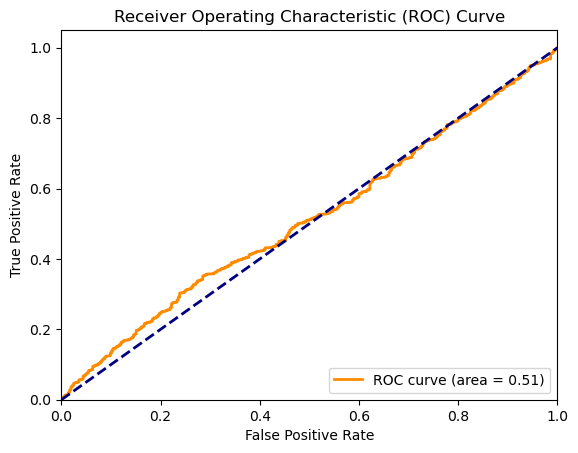

In [357]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.naive_bayes import MultinomialNB
import numpy as np

# Assuming you've already trained your Multinomial Naive Bayes classifier as 'nb_clf' and made predictions as 'nb_predict'

# Define which class corresponds to the positive class (0 or 1)
positive_class = 1

# Introduce random noise to training labels and store the true positive class labels
noise_ratio = 0.1
noisy_labels = np.random.choice([0, 1], size=len(oversampled_trainY), p=[noise_ratio, 1 - noise_ratio])
true_positive_labels = np.where(noisy_labels == positive_class, 1, 0)  # Convert labels to binary format

# Calculate the predicted probabilities for the positive class
nb_predict_proba = nb_clf.predict_proba(oversampled_trainX)[:, positive_class]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(true_positive_labels, nb_predict_proba)

# Calculate the ROC AUC (Area Under the Curve)
roc_auc = roc_auc_score(true_positive_labels, nb_predict_proba)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


## LSTM

In [330]:
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import LSTM, Dense, Embedding, Dropout, Bidirectional, GlobalMaxPooling1D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [331]:
model = Sequential()
model.add(Embedding(input_dim = vocab_size, output_dim = 200,input_length=maxlen, trainable=True))
model.add(LSTM(128,return_sequences=True,dropout=0.2, recurrent_dropout=0.4))
model.add(GlobalMaxPooling1D())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
es = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=3)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', save_best_only=True,verbose=1)
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 100, 200)          4571200   
                                                                 
 lstm_10 (LSTM)              (None, 100, 128)          168448    
                                                                 
 global_max_pooling1d_10 (Gl  (None, 128)              0         
 obalMaxPooling1D)                                               
                                                                 
 dense_20 (Dense)            (None, 64)                8256      
                                                                 
 dropout_10 (Dropout)        (None, 64)                0         
                                                                 
 dense_21 (Dense)            (None, 1)                 65        
                                                     

In [332]:
history = model.fit(X_train,sentiment_train,batch_size=128,epochs=10,verbose=1,callbacks=[es,mc])

Epoch 1/10
30/30 [==============================] - 20s 545ms/step - loss: 0.6881 - accuracy: 0.5544
Epoch 2/10
30/30 [==============================] - 16s 533ms/step - loss: 0.5086 - accuracy: 0.8045
Epoch 3/10
30/30 [==============================] - 16s 535ms/step - loss: 0.2636 - accuracy: 0.9280
Epoch 4/10
30/30 [==============================] - 15s 505ms/step - loss: 0.1259 - accuracy: 0.9672
Epoch 5/10
30/30 [==============================] - 15s 500ms/step - loss: 0.1089 - accuracy: 0.9789
Epoch 6/10
30/30 [==============================] - 14s 472ms/step - loss: 0.0668 - accuracy: 0.9851
Epoch 7/10
30/30 [==============================] - 13s 442ms/step - loss: 0.0241 - accuracy: 0.9941
Epoch 8/10
30/30 [==============================] - 13s 428ms/step - loss: 0.0240 - accuracy: 0.9947
Epoch 9/10
30/30 [==============================] - 14s 470ms/step - loss: 0.0175 - accuracy: 0.9968
Epoch 10/10
30/30 [==============================] - 13s 453ms/step - loss: 0.0139 - accura

In [333]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Assuming 'model' is already defined and trained

# Predict on the test set
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# Print classification report
print("Classification Report:\n", classification_report(sentiment_test, y_pred_binary, labels=[0, 1]))

# Print accuracy
accuracy = accuracy_score(sentiment_test, y_pred_binary)
print("Accuracy:", accuracy)

# Print confusion matrix
conf_matrix = confusion_matrix(sentiment_test, y_pred_binary, labels=[0, 1])
print("Confusion Matrix:\n", conf_matrix)


40/40 [==============================] - 1s 27ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.84      0.81       670
           1       0.80      0.74      0.77       580

    accuracy                           0.80      1250
   macro avg       0.80      0.79      0.79      1250
weighted avg       0.80      0.80      0.79      1250

Accuracy: 0.7952
Confusion Matrix:
 [[562 108]
 [148 432]]


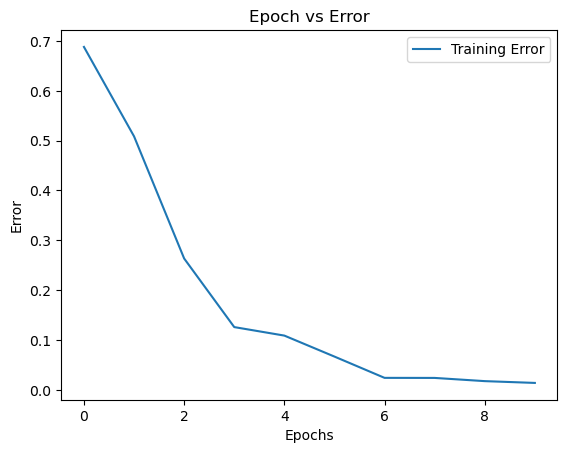

In [334]:
plt.plot(history.history['loss'], label='Training Error')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Epoch vs Error')
plt.legend()
plt.show()


In [335]:
score_lstm = model.evaluate(X_test,sentiment_test)

40/40 [==============================] - 1s 27ms/step - loss: 1.1492 - accuracy: 0.7952


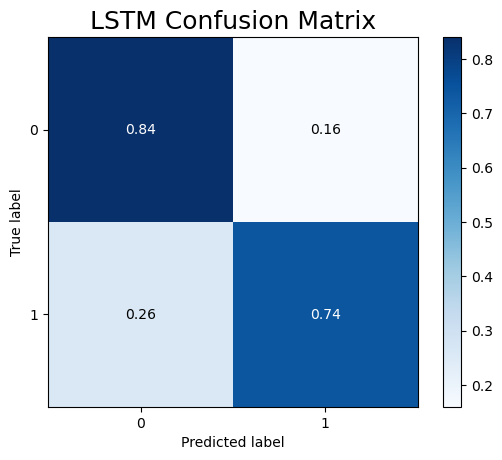

In [336]:
plot_confusion_matrix(sentiment_test,y_pred_binary,normalize=True)
plt.title("LSTM Confusion Matrix",size=18)
plt.show()

40/40 [==============================] - 1s 27ms/step


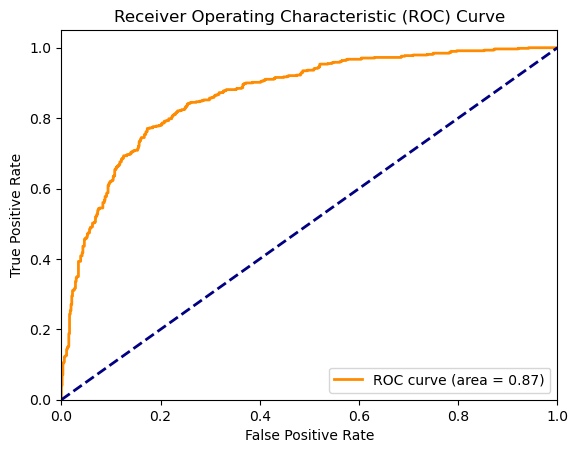

In [337]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming you have made predictions with your model (y_pred) and you have true labels (y_true)
y_pred = model.predict(X_test)  # Replace X_test with your test data
y_true = sentiment_test  # Replace sentiment_test with your true test labels

# Calculate the false positive rate (FPR) and true positive rate (TPR)
fpr, tpr, thresholds = roc_curve(y_true, y_pred)

# Calculate the ROC AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_true, y_pred)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


## BI-LSTM

In [358]:
model = Sequential()
model.add(Embedding(input_dim = vocab_size, output_dim = 200,input_length=maxlen,trainable =True))
model.add(Bidirectional(LSTM(128,return_sequences=True,dropout=0.2, recurrent_dropout=0.4)))
model.add(GlobalMaxPooling1D())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
es = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=3)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', save_best_only=True,verbose=1)
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, 100, 200)          4571200   
                                                                 
 bidirectional_6 (Bidirectio  (None, 100, 256)         336896    
 nal)                                                            
                                                                 
 global_max_pooling1d_12 (Gl  (None, 256)              0         
 obalMaxPooling1D)                                               
                                                                 
 dense_24 (Dense)            (None, 64)                16448     
                                                                 
 dropout_12 (Dropout)        (None, 64)                0         
                                                                 
 dense_25 (Dense)            (None, 1)               

In [359]:
history = model.fit(X_train,sentiment_train,batch_size=128,epochs=10,verbose=1,callbacks=[es,mc])

Epoch 1/10
30/30 [==============================] - 31s 800ms/step - loss: 0.6920 - accuracy: 0.5160
Epoch 2/10
30/30 [==============================] - 24s 800ms/step - loss: 0.5575 - accuracy: 0.7467
Epoch 3/10
30/30 [==============================] - 23s 775ms/step - loss: 0.2394 - accuracy: 0.9219
Epoch 4/10
30/30 [==============================] - 24s 797ms/step - loss: 0.0863 - accuracy: 0.9760
Epoch 5/10
30/30 [==============================] - 23s 769ms/step - loss: 0.0327 - accuracy: 0.9912
Epoch 6/10
30/30 [==============================] - 23s 771ms/step - loss: 0.0321 - accuracy: 0.9933
Epoch 7/10
30/30 [==============================] - 23s 771ms/step - loss: 0.0425 - accuracy: 0.9915
Epoch 8/10
30/30 [==============================] - 23s 756ms/step - loss: 0.0092 - accuracy: 0.9976
Epoch 9/10
30/30 [==============================] - 22s 732ms/step - loss: 0.0124 - accuracy: 0.9976
Epoch 10/10
30/30 [==============================] - 23s 763ms/step - loss: 0.0199 - accura

In [360]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Assuming 'model' is already defined and trained

# Predict on the test set
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# Print classification report
print("Classification Report:\n", classification_report(sentiment_test, y_pred_binary, labels=[0, 1]))

# Print accuracy
accuracy = accuracy_score(sentiment_test, y_pred_binary)
print("Accuracy:", accuracy)

# Print confusion matrix
conf_matrix = confusion_matrix(sentiment_test, y_pred_binary, labels=[0, 1])
print("Confusion Matrix:\n", conf_matrix)

40/40 [==============================] - 3s 53ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.89      0.84       670
           1       0.85      0.74      0.79       580

    accuracy                           0.82      1250
   macro avg       0.82      0.81      0.81      1250
weighted avg       0.82      0.82      0.82      1250

Accuracy: 0.8168
Confusion Matrix:
 [[594  76]
 [153 427]]


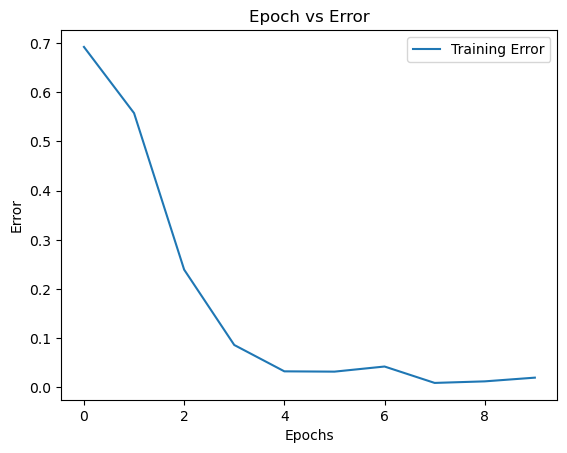

In [361]:
plt.plot(history.history['loss'], label='Training Error')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Epoch vs Error')
plt.legend()
plt.show()

In [362]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
y_pred_binary = np.where(y_pred > 0.5, 1, 0)
# classification_report(sentiment_test, y_pred_binary)
# sentiment_test
# y_pred_binary
# X_test
print(classification_report(sentiment_test, y_pred_binary,labels=[0,1]))

40/40 [==============================] - 2s 52ms/step
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       670
           1       0.85      0.74      0.79       580

    accuracy                           0.82      1250
   macro avg       0.82      0.81      0.81      1250
weighted avg       0.82      0.82      0.82      1250



40/40 [==============================] - 2s 52ms/step


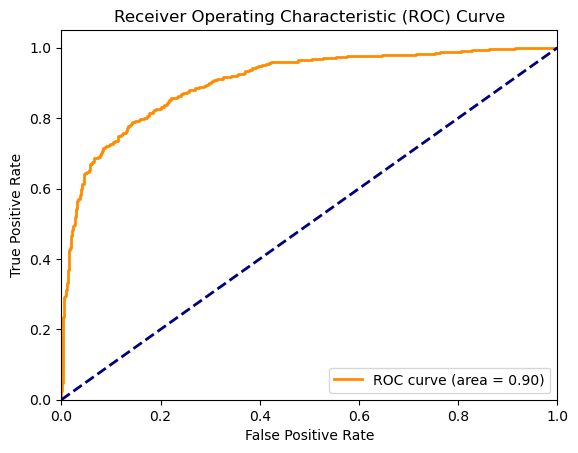

In [363]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming you have made predictions with your model (y_pred) and you have true labels (y_true)
y_pred = model.predict(X_test)  # Replace X_test with your test data
y_true = sentiment_test  # Replace sentiment_test with your true test labels

# Calculate the false positive rate (FPR) and true positive rate (TPR)
fpr, tpr, thresholds = roc_curve(y_true, y_pred)

# Calculate the ROC AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_true, y_pred)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [364]:
score_bilstm = model.evaluate(X_test,sentiment_test)

40/40 [==============================] - 3s 53ms/step - loss: 0.5307 - accuracy: 0.8168


In [365]:
from sklearn.linear_model import SGDClassifier
clf= SGDClassifier(loss='hinge', penalty='l2', alpha=0.001, l1_ratio=0.15, max_iter=1000, tol=0.001, learning_rate='optimal')
clf.fit(oversampled_trainX,oversampled_trainY)
y_pred = clf.predict(reviews_test_tfidf)


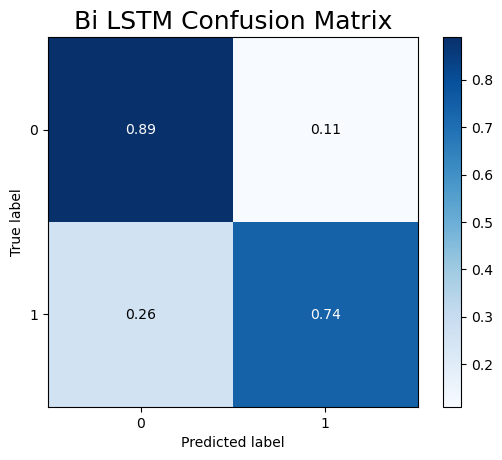

In [366]:
plot_confusion_matrix(sentiment_test,y_pred_binary,normalize=True)
plt.title("Bi LSTM Confusion Matrix",size=18)
plt.show()